<a href="https://colab.research.google.com/github/scon012/722-Iteration-4/blob/master/Family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Family History in dates

In [3]:
# For Google Step 1 – install spark
# Install Pydrive so that the data files can be got from GoogleDrive
!pip install PyDrive

# Other environment imports
#from pyspark.sql.functions import datediff, to_date, lit, when, date_sub, col, isnan, count, abs, expr, unix_timestamp, to_timestamp, date_format, year
#from pyspark.ml.feature import ChiSqSelector, VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
#from pyspark.ml.classification import LogisticRegression, MultilayerPerceptronClassifier, RandomForestClassifier
#from pyspark.ml import Pipeline

# Required to use PyDrive to get the data from Google Drive
import gspread
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

In [0]:
# Get the data from Google Drive
auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())

# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Load the workbook into Colab
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/14emfnzBIsUsBsKCy7F6kB4k-7HVmJHKe4ePDqdDAbAA/edit?usp=sharing')
sheet = wb.worksheet('Events')
data = sheet.get_all_values()


In [0]:
# Load the data into Pandas and set the first row as column names
events = pd.DataFrame(data)
events.columns = events.iloc[0]
events = events.iloc[1:]


In [24]:
events.head(10)

,StartDate,EndDate,EventType,Person01,Person02,Person03,Location,Info01,Info02,Info03,Info04,Info05,Info06,Info07,Info08,Info09,Info10
1,1943-01-02,,Birth,"Smith, Matarii Elizabeth",,,,,,,,,,,,,
2,1941-09-05,,Birth,"Connor, David Allan",,,,,,,,,,,,,
3,1966-01-22,,Wedding,"Connor, David Allan","Smith, Matarii Elizabeth",,,,,,,,,,,,
4,2006-11-01,2008-11-01,Lived at,"Connor, Stephen Robert Nicholas",,,Home,,,,,,,,,,
5,2006-11-01,2008-11-01,Lived at,"Montgomerie, Kaye Louise",,,Home,,,,,,,,,,
6,2008-11-01,2999-12-31,Lived at,"Montgomerie, Kaye Louise",,,Home 1A,,,,,,,,,,
7,2008-11-01,2999-12-31,Lived at,"Montgomerie, Kaye Louise",,,Home 1A,,,,,,,,,,
8,2006-01-22,,Wedding,"Connor, Stephen Robert Nicholas","Montgomerie, Kaye Louise Montgomerie","Connor, David Allan",Gordonton,,,,,,,,,,
9,1990-01-26,,Death,"Montgomerie, Gavin",,,,Cancer,,,,,,,,,
10,2013-09-06,,Death,"Smith, William Kennedy",,,,Heart failure,,,,,,,,,


In [0]:
# Import the needed libraries
import matplotlib.dates as mdates
from datetime import datetime


In [43]:
# Extract the data
birth_dates = events[events['EventType']=='Birth']
birth_dates = birth_dates.sort_values(by=['StartDate'])
birth_dates.head(10)

,StartDate,EndDate,EventType,Person01,Person02,Person03,Location,Info01,Info02,Info03,Info04,Info05,Info06,Info07,Info08,Info09,Info10
2,1941-09-05,,Birth,"Connor, David Allan",,,,,,,,,,,,,
1,1943-01-02,,Birth,"Smith, Matarii Elizabeth",,,,,,,,,,,,,
15,1943-11-03,,Birth,"Montgomerie, Gavin",,,,,,,,,,,,,
16,1944-01-14,,Birth,"Smith, Robert Kennedy",,,,,,,,,,,,,
17,1945-09-30,,Birth,"Gummer, Barbara",,,,,,,,,,,,,
19,1945-11-08,,Birth,"Henaghan, Susan",,,,,,,,,,,,,
14,1947-09-21,,Birth,"Smith, William Nicholas","Nicholas, Matarii","Smith, William Kennedy",Auckland Hospital,,,,,,,,,,
18,1949-02-11,,Birth,"Smith, Kenneth Exham",,,,,,,,,,,,,
20,1959-01-19,,Birth,"Sawyer, Lesley",,,,,,,,,,,,,
13,1970-10-22,,Birth,"Connor, Stephen Robert Nicholas","Smith, Matarii Elizabeth","Connor, David Allan",Auckland Hospital,,,,,,,,,,


In [44]:
dates = pd.to_datetime(birth_dates['StartDate'])

print(dates)

2    1941-09-05
1    1943-01-02
15   1943-11-03
16   1944-01-14
17   1945-09-30
19   1945-11-08
14   1947-09-21
18   1949-02-11
20   1959-01-19
13   1970-10-22
12   1970-12-27
21   2011-06-11
22   2013-12-06
23   2015-11-11
Name: StartDate, dtype: datetime64[ns]


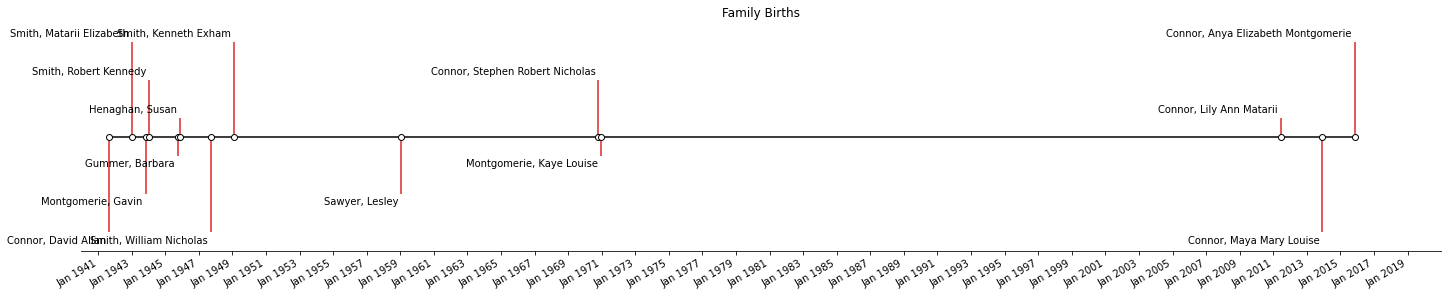

In [45]:
# Timeline in matplotlib

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(birth_dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 4), constrained_layout=True)
ax.set(title="Family Births")

markerline, stemline, baseline = ax.stem(dates, levels, linefmt="C3-", basefmt="k-", use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, birth_dates['Person01'], vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3), textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=24))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]: ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.xlim(pd.to_datetime('1940-01-01'), pd.to_datetime('2020-12-31'))

plt.show()

